In [ ]:
import numpy as np
import csv
from google.colab import drive
from pathlib import Path
import os

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_path = Path('/content/drive/MyDrive/Colab Notebooks/data')
folder_path=data_path/'licenta/Translation'
csv_1=folder_path/'eee_0_f.csv'
csv_2=folder_path/'nya_f.csv'

csv_3=folder_path/'Predictions/predict_ntu_1.csv'
csv_4=folder_path/'Predictions/predict_ntu_kitti_1.csv'

csv_5=folder_path/'Predictions/predict_ntu_new_data.csv'
csv_6=folder_path/'Predictions/predict_ntu_kitti_new_data.csv'


csv_tr1=folder_path/'sit1.csv'
csv_tr2=folder_path/'sit2.csv'
csv_tr3=folder_path/'sit3.csv'
csv_tr4=folder_path/'sit4.csv'


In [ ]:
r00=[]
r01=[]
r02=[]
t0=[]
r10=[]
r11=[]
r12=[]
t1=[]
r20=[]
r21=[]
r22=[]
t2=[]
with open(csv_6,'r',encoding='utf-8-sig') as file:
  reader=csv.reader(file)
  for(row) in reader:
    r00.append(row[0])
    r01.append(row[1])
    r02.append(row[2])
    t0.append(row[3])
    r10.append(row[4])
    r11.append(row[5])
    r12.append(row[6])
    t1.append(row[7])
    r20.append(row[8])
    r21.append(row[9])
    r22.append(row[10])
    t2.append(row[11])
r00 = np.array(r00, dtype=np.float64)
r01 = np.array(r01, dtype=np.float64)
r02 = np.array(r02, dtype=np.float64)
t0 = np.array(t0, dtype=np.float64)
r10 = np.array(r10, dtype=np.float64)
r11 = np.array(r11, dtype=np.float64)
r12 = np.array(r12, dtype=np.float64)
t1 = np.array(t1, dtype=np.float64)
r20 = np.array(r20, dtype=np.float64)
r21 = np.array(r21, dtype=np.float64)
r22 = np.array(r22, dtype=np.float64)
t2 = np.array(t2, dtype=np.float64)
rot_matrix = np.empty((len(r00), 3, 3))
rot_matrix[:, 0, 0] = r00
rot_matrix[:, 0, 1] = r01
rot_matrix[:, 0, 2] = r02
rot_matrix[:, 1, 0] = r10
rot_matrix[:, 1, 1] = r11
rot_matrix[:, 1, 2] = r12
rot_matrix[:, 2, 0] = r20
rot_matrix[:, 2, 1] = r21
rot_matrix[:, 2, 2] = r22
trans_matrix=np.empty((len(r00),3))
trans_matrix[:, 0] = t0
trans_matrix[:, 1] = t1
trans_matrix[:, 2] = t2


In [ ]:
r00_real=[]
r01_real=[]
r02_real=[]
t0_real=[]
r10_real=[]
r11_real=[]
r12_real=[]
t1_real=[]
r20_real=[]
r21_real=[]
r22_real=[]
t2_real=[]
with open(csv_2,'r',encoding='utf-8-sig') as file:
  reader=csv.reader(file)
  for(row) in reader:
    r00_real.append(row[0])
    r01_real.append(row[1])
    r02_real.append(row[2])
    t0_real.append(row[3])
    r10_real.append(row[4])
    r11_real.append(row[5])
    r12_real.append(row[6])
    t1_real.append(row[7])
    r20_real.append(row[8])
    r21_real.append(row[9])
    r22_real.append(row[10])
    t2_real.append(row[11])
r00_real = np.array(r00_real, dtype=np.float64)
r01_real = np.array(r01_real, dtype=np.float64)
r02_real = np.array(r02_real, dtype=np.float64)
t0_real = np.array(t0_real, dtype=np.float64)
r10_real = np.array(r10_real, dtype=np.float64)
r11_real = np.array(r11_real, dtype=np.float64)
r12_real = np.array(r12_real, dtype=np.float64)
t1_real = np.array(t1_real, dtype=np.float64)
r20_real = np.array(r20_real, dtype=np.float64)
r21_real = np.array(r21_real, dtype=np.float64)
r22_real = np.array(r22_real, dtype=np.float64)
t2_real = np.array(t2_real, dtype=np.float64)
rot_matrix_real = np.empty((len(r00_real), 3, 3))
rot_matrix_real[:, 0, 0] = r00_real
rot_matrix_real[:, 0, 1] = r01_real
rot_matrix_real[:, 0, 2] = r02_real
rot_matrix_real[:, 1, 0] = r10_real
rot_matrix_real[:, 1, 1] = r11_real
rot_matrix_real[:, 1, 2] = r12_real
rot_matrix_real[:, 2, 0] = r20_real
rot_matrix_real[:, 2, 1] = r21_real
rot_matrix_real[:, 2, 2] = r22_real
trans_matrix_real=np.empty((len(r00_real),3))
trans_matrix_real[:, 0] = t0_real
trans_matrix_real[:, 1] = t1_real
trans_matrix_real[:, 2] = t2_real

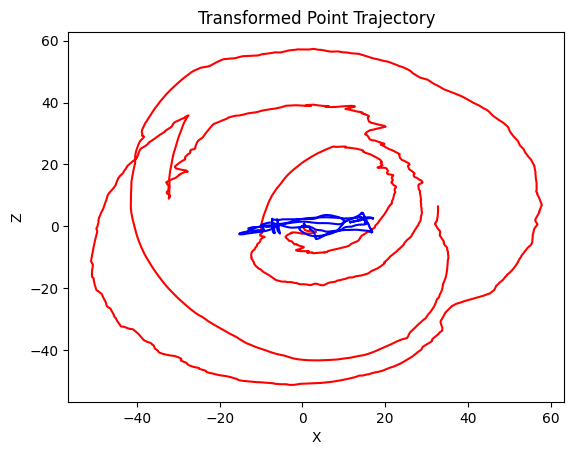

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# starting point
point = np.array([0, 0, 0])
point_real = np.array([0, 0, 0])

# list to store the 2D coordinates of the point at each moment
x_coords = [0]
z_coords = [0]
x_coords_real = [0]
z_coords_real = [0]

# loop through each moment and apply transformation to the point
for i in range(len(rot_matrix)):
    # apply rotation and translation to point
    point = np.matmul(point, np.transpose(rot_matrix[i])) + trans_matrix[i]

    x_coords.append(point[0])
    z_coords.append(point[2])

    point_real = np.matmul(point_real, np.transpose(rot_matrix_real[i])) + trans_matrix_real[i]

    x_coords_real.append(point_real[0])
    z_coords_real.append(point_real[2])


plt.plot(x_coords, z_coords,'r-', label='Predictions')
plt.plot(x_coords_real, z_coords_real,'b-', label='Real Data')

# add labels or annotations as desired
plt.xlabel('X')
plt.ylabel('Z')
plt.title('Transformed Point Trajectory')
plt.show()

In [ ]:
from scipy.spatial.transform import Rotation

with open(csv_tr4, mode='a', newline='') as file:
      writer = csv.writer(file)
      writer.writerow(["Pair","Translation X","Translation Y","Translation Z",'Yaw','Pitch','Roll','',"Translation X Real","Translation Y Real","Translation Z Real",'Yaw Real','Pitch Real','Roll Real'])
for i in range(len(rot_matrix)):
    r = Rotation.from_matrix(rot_matrix[i])
    euler_angles = r.as_euler('xyz')
    r_real = Rotation.from_matrix(rot_matrix_real[i])
    euler_angles_r = r_real.as_euler('xyz')

    with open(csv_tr4, mode='a', newline='') as file:
      writer = csv.writer(file)
      writer.writerow(["",trans_matrix[i, 0],trans_matrix[i, 1],trans_matrix[i, 2],euler_angles[0],euler_angles[1],euler_angles[2],"",trans_matrix_real[i, 0],trans_matrix_real[i, 1],trans_matrix_real[i, 2],euler_angles_r[0],euler_angles_r[1],euler_angles_r[2]])






